<a href="https://colab.research.google.com/github/entelecheia/ekorpkit-config/blob/main/notebooks/sentiment/financial_phrasebank_lm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

In [1]:
%%capture
%pip install ekorpkit[model,tokenize,dataset]==0.1.25.post0.dev5

## Prepare `financial_phrasebank` dataset

In [1]:
from ekorpkit import eKonf

ds_cfg = eKonf.compose(config_group='dataset=dataset')
ds_cfg['name'] = 'financial_phrasebank'
ds_cfg.data_dir = "${cached_path:'gd://15TUjIfQstCYXU82s0pcaxh2QcSWf1zyG:financial_phrasebank.zip',true,false}"
ds_cfg.use_name_as_subdir = False
ds = eKonf.instantiate(ds_cfg)
ds.info

{'name': 'financial_phrasebank',
 'domain': 'econ',
 'task': 'classification',
 'lang': 'en',
 'column_info': {'keys': {'id': 'id', 'text': 'text'},
  'data': {'id': 'int', 'labels': 'str', 'text': 'str'}},
 'splits': {'train': {'name': 'train',
   'dataset_name': 'financial_phrasebank',
   'data_file': 'financial_phrasebank-train.csv',
   'num_examples': 1445,
   'num_bytes': 176485,
   'num_bytes_median': 112.0,
   'num_bytes_max': 315,
   'num_bytes_min': 15,
   'human_bytes': '172.35 KiB'},
  'test': {'name': 'test',
   'dataset_name': 'financial_phrasebank',
   'data_file': 'financial_phrasebank-test.csv',
   'num_examples': 452,
   'num_bytes': 55518,
   'num_bytes_median': 110.0,
   'num_bytes_max': 296,
   'num_bytes_min': 11,
   'human_bytes': '54.22 KiB'},
  'dev': {'name': 'dev',
   'dataset_name': 'financial_phrasebank',
   'data_file': 'financial_phrasebank-dev.csv',
   'num_examples': 362,
   'num_bytes': 43404,
   'num_bytes_median': 109.0,
   'num_bytes_max': 296,
   'n

## Compose a config for the LM sentiment analyser class

In [2]:
from ekorpkit import eKonf

config_group='model/sentiment=lm'
model_cfg = eKonf.compose(config_group=config_group)
model_cfg.preprocessor.tokenizer.nltk.lemmatize = True

## Instantiating a sentiment analyser class with `financial_phrasebank` dataset

In [3]:
cfg = eKonf.compose(config_group='pipeline=pipeline')
cfg.verbose = True
cfg.dataset = ds_cfg
cfg._pipeline_ = ['predict']
cfg.predict.model = model_cfg
cfg.predict.output_dir = "./data/predict"
cfg.predict.output_file = f'{ds_cfg.name}.parquet'
cfg.num_workers = 1
df = eKonf.instantiate(cfg)
df

{'autoload': True,
 'column_info': {'data': {'id': 'int', 'labels': 'str', 'text': 'str'},
                 'keys': {'id': 'id', 'text': 'text'}},
 'data_dir': '/root/.ekorpkit/.cache/gdown/.15TUjIfQstCYXU82s0pcaxh2QcSWf1zyG/financial_phrasebank',
 'data_files': {'dev': 'financial_phrasebank-dev.csv',
                'test': 'financial_phrasebank-test.csv',
                'train': 'financial_phrasebank-train.csv'},
 'data_files_modified': '2022-04-22 03:18:20',
 'domain': 'econ',
 'filetype': 'csv',
 'info_updated': '2022-04-22 03:18:20',
 'lang': 'en',
 'meta_files': {},
 'name': 'financial_phrasebank',
 'num_examples': 2259,
 'size_in_bytes': 275407,
 'size_in_human_bytes': '268.95 KiB',
 'splits': {'dev': {'data_file': 'financial_phrasebank-dev.csv',
                    'dataset_name': 'financial_phrasebank',
                    'human_bytes': '42.39 KiB',
                    'name': 'dev',
                    'num_bytes': 43404,
                    'num_bytes_max': 296,
          

Predicting [text]:   0%|          | 0/1445 [00:00<?, ?it/s]

 >> saved dataframe to ./data/predict/financial_phrasebank-train.parquet


Predicting [text]:   0%|          | 0/452 [00:00<?, ?it/s]

 >> saved dataframe to ./data/predict/financial_phrasebank-test.parquet


Predicting [text]:   0%|          | 0/362 [00:00<?, ?it/s]

 >> saved dataframe to ./data/predict/financial_phrasebank-dev.parquet


{'train':         id    labels                                               text  \
 0      655   neutral  Customers in a wide range of industries use ou...   
 1      634   neutral  The writing and publication of Lemmink+ñinen -...   
 2     1030   neutral  Sullivan said some of the boards `` really inv...   
 3      317  positive  The six breweries recorded a 5.2 percent growt...   
 4      868  positive  In the second quarter of 2010 , the company 's...   
 ...    ...       ...                                                ...   
 1440   136  positive  In the fourth quarter of 2009 , Orion 's net p...   
 1441  2170  negative  Profit for the period totalled EUR 1.1 mn , do...   
 1442   344  positive  The diluted loss per share narrowed to EUR 0.2...   
 1443   573   neutral  LKAB , headquartered in Lulea , Sweden , is a ...   
 1444  1768   neutral  The EBRD is using its own funds to provide a 2...   
 
       split  polarity  subjectivity polarity_label  uncertainty  
 0     tra

In [4]:
print(cfg.predict.output_dir)
print(cfg.predict.output_file)

./data/predict
financial_phrasebank.parquet


Loading 3 dataframes from ['./data/predict/financial_phrasebank-train.parquet', './data/predict/financial_phrasebank-test.parquet', './data/predict/financial_phrasebank-dev.parquet']
Accuracy:  0.6418769366976538
Precison:  0.6332357082536276
Recall:  0.6418769366976538
F1 Score:  0.5976583790508804
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

    negative       0.38      0.36      0.37       303
     neutral       0.68      0.89      0.77      1386
    positive       0.65      0.19      0.29       570

    accuracy                           0.64      2259
   macro avg       0.57      0.48      0.48      2259
weighted avg       0.63      0.64      0.60      2259



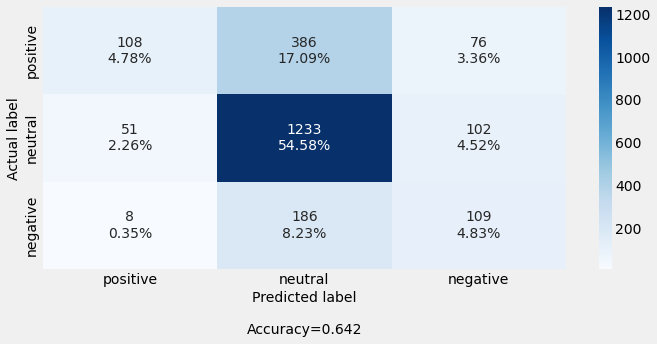

In [5]:
eval_cfg = eKonf.compose(config_group='model/eval=classification')
eval_cfg.to_eval.actual = 'labels'
eval_cfg.to_eval.predicted = 'polarity_label'
eval_cfg.to_eval.labels = ['positive','neutral','negative']
eval_cfg.data_dir = './data/predict'
eval_cfg.data_file = 'financial_phrasebank-*.parquet'
eval_cfg.output_dir = './data/eval'
# eval_cfg.method.average = None
# eKonf.print(eval_cfg)
eKonf.instantiate(eval_cfg)

## Instantiating a transformer classficiation model with `financial_phrasebank` dataset

  0%|          | 0/1445 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

wandb: wandb version 0.12.16 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Running Epoch 0 of 2:   0%|          | 0/46 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/452 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/15 [00:00<?, ?it/s]

Training loss,▁
acc,▁█
eval_loss,█▁
global_step,▁▂█
lr,▁
mcc,▁█
train_loss,█▁
Training loss,0.4113
acc,0.89503
eval_loss,0.35953
global_step,92


wandb: wandb version 0.12.16 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


  0%|          | 0/452 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Accuracy:  0.8561946902654868
Precison:  0.8551146519028728
Recall:  0.8561946902654868
F1 Score:  0.855446906206175
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

    negative       0.75      0.69      0.72        61
     neutral       0.94      0.95      0.94       277
    positive       0.72      0.73      0.72       114

    accuracy                           0.86       452
   macro avg       0.80      0.79      0.79       452
weighted avg       0.86      0.86      0.86       452



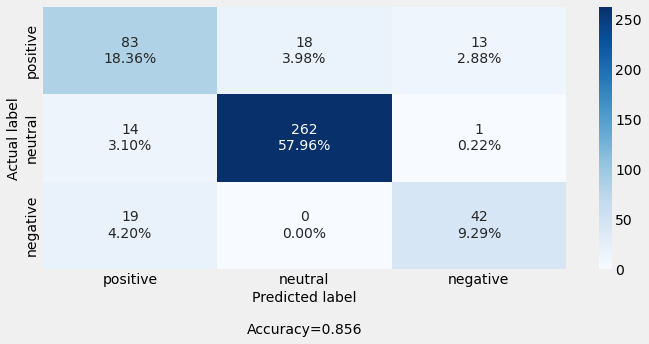

In [7]:
overrides=[
    '+model/transformer=simple_classification',
    '+model/transformer/pretrained=finbert',
]
model_cfg = eKonf.compose(overrides=overrides, config_group='model/transformer=simple_classification')
model_cfg.dataset = ds_cfg
model_cfg.verbose = False
model_cfg.config.num_train_epochs = 2
model_cfg.config.max_seq_length = 256
model_cfg.config.train_batch_size = 32
model_cfg.config.eval_batch_size = 32
model_cfg.labels = ['positive','neutral','negative']
eKonf.instantiate(model_cfg)